# Week 10 In-Class Activity: Working with 3-D Data (time, lat, lon)


## Part I: Data Preparation for the Southern Annular Mode

Here, we will start to practice working with multi-dimensional data and go through the data pre-processing steps that are necessary before we can actually begin an EOF analysis. Data processing and management is an important skill that transcends scientific disciplines.

In this example, we are building towards calculating the Southern Annular Mode (SAM). The SAM is a weather phenomenon in the Southern Hemisphere extratropical atmosphere. It is characterizes fluctuations in atmospheric pressure at sea level (SLP) between the Antarctic continent and the Southern Ocean. Through these fluctuations in the strength of the pressure gradient, the SAM represents variability in the strength and direction of westerly winds and location of storm tracks across the Southern Ocean.

In order create nice spatial plots in python, we will use a package called `cartopy`. Let's start by loading all the packages that we will need.

In [104]:
# load packages
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl
import matplotlib.path as mpath
mpl.rc('font',size=14) #set default font size for plots
import warnings
warnings.filterwarnings("ignore")

We will read in sea-level pressure data from a quasi-observational data product called reanalysis, [ERA-Interim](https://www.ecmwf.int/en/forecasts/datasets/reanalysis-datasets/era-interim). Download the netcdf file [here](https://www.dropbox.com/s/brssg2g5m2tzn6y/ERAI_PSL_1980_2017.nc?dl=0).

In [103]:
# Data is from the ERA-Interim reanalysis data product.
# It was downloaded from http://apps.ecmwf.int/datasets/data/interim-full-moda/levtype=sfc/

#open netcdf file
fname = 'ERAI_PSL_1980_2017.nc' # only Dec, Jan, Feb and Mar of each season are read in
nc    = Dataset(fname)
psl   = np.squeeze(nc.variables['msl'][:,:,:])
lon   = nc.variables['longitude'][:]
lat   = nc.variables['latitude'][:]

Let's take a look at the dimensions of our data by calling `psl.shape`. Also, check the length of `lat` and `lon`.

In [3]:
print(psl.shape,len(lat),len(lon))

(152, 241, 480) 241 480


We have a 3-D sea level pressure variable and the dimensions are in the following order: (time, lat, lon).

In [172]:
# Check how many winters (Dec. - Mar.) we have.
# We have 152 elements in the time dimension and we have four months per season (DJFM)
nyears = 152/4
print(nyears)

38.0


Calculate winter averages for each year:

In [184]:
psl.reshape(-1, 4,len(lat),len(lon)).shape

(38, 4, 241, 480)

In [186]:
# create average winter seasons (Dec-Mar). Review the persistence in time series section of the courseware.
# Note that we still need to keep track of the spatial dimensions when we reshape.

psl_djfm = np.mean(psl.reshape(-1, 4,len(lat),len(lon)), axis=1)
psl_djfm.shape

(38, 241, 480)

Average over all years to get the climatological mean DJFM psl:

In [187]:
#average over all years to get the climatological mean DJFM psl.
psl_djfm_clim = np.mean(psl_djfm,axis=0)

## Part II: Plotting the mean using `cartopy`

With `cartopy` we are able to define different map projections. We will just use the simple rectangular projection to start. 

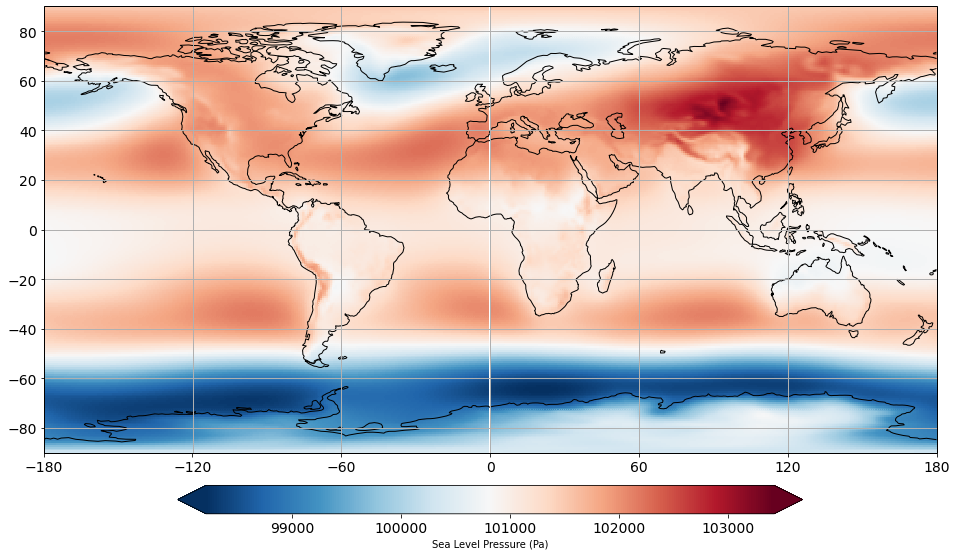

In [188]:
# define the map projection
# The projection keyword determines how the plot will look

# set up plot
fig, ax = plt.subplots(1, 1, figsize=(16,12))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.gridlines(linewidth=1)
ax.set_xticks([-180, -120, -60, 0, 60, 120, 180],crs=ccrs.PlateCarree())
ax.set_yticks([-80, -60, -40, -20, 0, 20, 40, 60, 80],crs=ccrs.PlateCarree())

# plot data
pc = ax.pcolormesh(lon,lat,psl_djfm_clim,cmap="RdBu_r")

# add colorbar
cax,kw = mpl.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)
out=fig.colorbar(pc,cax=cax,extend='both',**kw)
out.set_label('Sea Level Pressure (Pa)',size=10)

This looks reasonable. We should see higher sea-leveal pressure (psl) in the hot sub-tropical regions and lower psl in the storm track regions.

## Part II: Slicing

Now, we are going to focus only on psl in the Southern Hemisphere (20S-90S)

Let's extract and plot the Southern Hemisphere (SH) climatological psl only. First, you will need to figure out what latitudes to extract. Use slicing to extract the region from 20S-90S from you psl data.

In [189]:
print(lat)

[ 90.    89.25  88.5   87.75  87.    86.25  85.5   84.75  84.    83.25
  82.5   81.75  81.    80.25  79.5   78.75  78.    77.25  76.5   75.75
  75.    74.25  73.5   72.75  72.    71.25  70.5   69.75  69.    68.25
  67.5   66.75  66.    65.25  64.5   63.75  63.    62.25  61.5   60.75
  60.    59.25  58.5   57.75  57.    56.25  55.5   54.75  54.    53.25
  52.5   51.75  51.    50.25  49.5   48.75  48.    47.25  46.5   45.75
  45.    44.25  43.5   42.75  42.    41.25  40.5   39.75  39.    38.25
  37.5   36.75  36.    35.25  34.5   33.75  33.    32.25  31.5   30.75
  30.    29.25  28.5   27.75  27.    26.25  25.5   24.75  24.    23.25
  22.5   21.75  21.    20.25  19.5   18.75  18.    17.25  16.5   15.75
  15.    14.25  13.5   12.75  12.    11.25  10.5    9.75   9.     8.25
   7.5    6.75   6.     5.25   4.5    3.75   3.     2.25   1.5    0.75
   0.    -0.75  -1.5   -2.25  -3.    -3.75  -4.5   -5.25  -6.    -6.75
  -7.5   -8.25  -9.    -9.75 -10.5  -11.25 -12.   -12.75 -13.5  -14.25
 -15. 

In [190]:
# select only latitudes from 20S-90S
lat_sh = lat[147:]
print(lat_sh)

[-20.25 -21.   -21.75 -22.5  -23.25 -24.   -24.75 -25.5  -26.25 -27.
 -27.75 -28.5  -29.25 -30.   -30.75 -31.5  -32.25 -33.   -33.75 -34.5
 -35.25 -36.   -36.75 -37.5  -38.25 -39.   -39.75 -40.5  -41.25 -42.
 -42.75 -43.5  -44.25 -45.   -45.75 -46.5  -47.25 -48.   -48.75 -49.5
 -50.25 -51.   -51.75 -52.5  -53.25 -54.   -54.75 -55.5  -56.25 -57.
 -57.75 -58.5  -59.25 -60.   -60.75 -61.5  -62.25 -63.   -63.75 -64.5
 -65.25 -66.   -66.75 -67.5  -68.25 -69.   -69.75 -70.5  -71.25 -72.
 -72.75 -73.5  -74.25 -75.   -75.75 -76.5  -77.25 -78.   -78.75 -79.5
 -80.25 -81.   -81.75 -82.5  -83.25 -84.   -84.75 -85.5  -86.25 -87.
 -87.75 -88.5  -89.25 -90.  ]


In [191]:
#Now select only the values of the climatological PSL corresponding to these latitudes
psl_djfm_clim_sh = psl_djfm_clim[147:,:]

Now, let's plot the SH psl climatology. Here we will use a different projection, a **polar stereographic** projection. This type of projection is useful for plotting data in the polar regions. To do this, we will need to change the projection that we use to "SouthPolarStereo".

We are going to do a lot of these polar stereographic plots, so let's create a plotting function:

In [192]:
def plot_SouthPolarStereo(lon,lat,data,colorbar_label,colormap):
    # define projection of original data
    data_crs = ccrs.PlateCarree() # this is the projection for a rectangular grid

    # define new projection
    new_crs=ccrs.SouthPolarStereo(0, -90) # centre longitude and centre latitude

    # define figure and axes
    fig, ax = plt.subplots(1,1,figsize=(8,8))
    ax = plt.axes(projection=new_crs)
    ax.set_extent([-180,180,-90,-40], crs=ccrs.PlateCarree())
    ax.coastlines()
    gl = ax.gridlines(draw_labels=False, xlocs=None, ylocs=None)

    # Compute a circle in axes coordinates, which we can use as a boundary for the map. 
    # We can pan/zoom as much as we like - the boundary will be permanently circular.

    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)
    
    # limit for pcolormesh
    cmin = np.min(data)
    cmax = np.max(data)
    
    # centred colorbar
    if cmin < 0:
        if np.abs(cmin) > cmax:
            cmax = -cmin
        else:
            cmin = -cmax 

    # plot data in new projection, accounting for the projection of the original data (transform=data_crs) 
    pc = ax.pcolormesh(lon, lat, data, transform=data_crs,vmin=cmin,vmax=cmax,cmap=colormap) # convert to hPa by dividing by 100
    cax,kw = mpl.colorbar.make_axes(ax,location='right',pad=0.05,shrink=0.7)
    out=fig.colorbar(pc,cax=cax,extend='both',**kw)
    out.set_label(colorbar_label,size=12)

Let's call our function with the appropriate input.

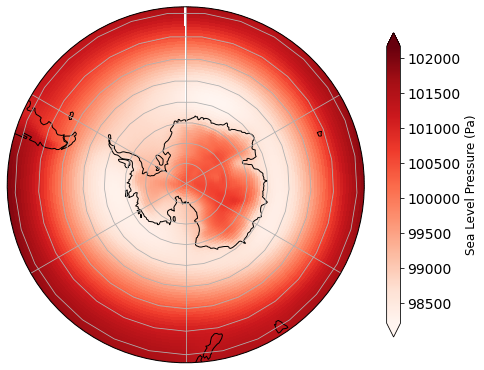

In [193]:
plot_SouthPolarStereo(lon,lat_sh,psl_djfm_clim_sh,"Sea Level Pressure (Pa)","Reds")

Looks nice!

## Part IV: Beyond the mean

Let's try plotting a few other quantities to familiarize ourselves with plotting in multiple dimensions.

Here, we are going to calculate the standard deviation of psl for the SH with respect to time as a function of latitude and longitude and then plot it.

First, let's just define psl for the SH, so we don't have to slice all the time.

In [194]:
# SH summer psl
psl_djfm_sh = psl_djfm[:,147:,:]

Now, calculate the standard deviation:

In [195]:
# calculate standard deviation
psl_djfm_sh_std = np.std(psl_djfm_sh,axis=0)

Let's plot it using the polar stereographic projection.

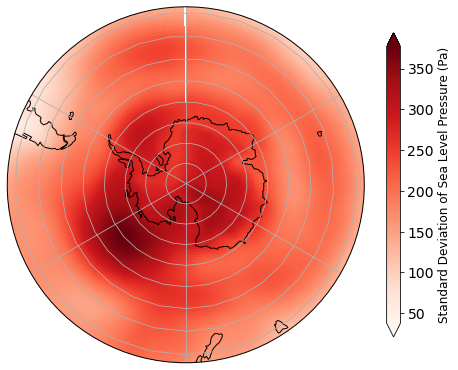

In [196]:
plot_SouthPolarStereo(lon,lat_sh,psl_djfm_sh_std,"Standard Deviation of Sea Level Pressure (Pa)","Reds")

Let's see if this pattern changes if we remove the climatological mean, i.e. let's calculate the standard deviation of the anomalies.

**Reflection Question:**\
What does this pattern tell you about the variability of psl in the SH?

Now, what if we wanted to plot the trend in psl with respect to time as a function of latitude and longitude - how would we go about doing that?

In [199]:
# create time variable for computing trend
time = np.arange(0,psl_djfm_sh.shape[0])

# initialize array of slopes for each grid point
trend = np.zeros((psl_djfm_sh.shape[1],psl_djfm_sh.shape[2]))

# loop over each grid point and compute trend
for i in range(psl_djfm_sh.shape[1]):
    for j in range(psl_djfm_sh.shape[2]):
        trend[i,j] = np.polyfit(time,psl_djfm_sh[:,i,j],1)[0]
        #trend[i,j]= a[0]

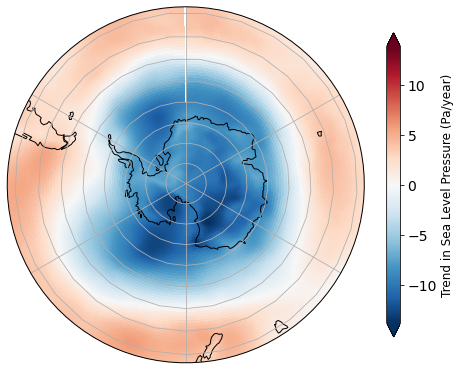

In [200]:
plot_SouthPolarStereo(lon,lat_sh,trend,"Trend in Sea Level Pressure (Pa/year)","RdBu_r")

## Part V: Area-averaging and cosine-weighting

For data on a rectangular grid, but on a sphere, there are times when we need to account for the fact that the area of each grid cell is not the same. For example, when we are taking an area average of a variable (e.g. globally-averaged temperature), we need to weight each grid cell by its area, so that we have an accurate representation of how much each grid cell contributes to the area average. 

When we calculate EOF's, we also need to area-weight in order to appropriately account for the contributions of different grid boxes to the variance. We will discuss this more in this week's courseware.

To area-weight our data, we define a cosine of latitude weighting and multiply our variable of interest by this weighting. Applying this weighting is essentially like multiplying the grid cell by the area of that cell.

Let's take a closer look at why we do the cosine weighting.

Assume that we simply have uniform data (e.g. value of 1 everywhere) on our original lat-lon grid.

In [174]:
# array of ones
uniform_data = np.ones((psl.shape[1],psl.shape[2]))

In [175]:
# Now, let's remove the mean, i.e., calculate anomalies (subtract the mean over each time series for each grid point)
# Make sure you also only extract latitudes 20S-90S!
psl_djfm_anom_sh = psl_djfm_sh - psl_djfm_clim_sh

psl_anom_std = np.std(psl_djfm_anom_sh,axis=0)

Let's plot this on a rectangular grid:

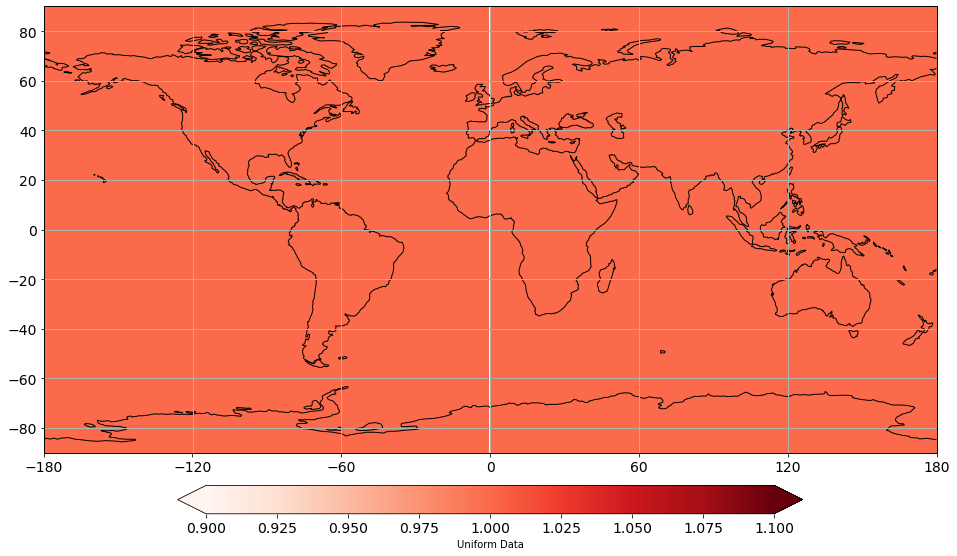

In [176]:
# Plot just like the global PSL.
# Use a different color map, e.g. cmap = "Reds"

# define projection
# The projection keyword determines how the plot will look
fig, ax = plt.subplots(1, 1, figsize=(16,12))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.gridlines(linewidth=1)
ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax.set_yticks([-80, -60, -40, -20, 0, 20, 40, 60, 80], crs=ccrs.PlateCarree())

# uncomment and complete the line below
pc = ax.pcolormesh(lon,lat,uniform_data,cmap="Reds")
cax,kw = mpl.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)
out=fig.colorbar(pc,cax=cax,extend='both',**kw)
out.set_label('Uniform Data',size=10)

This shows us how the area of each grid cell is weighted on a simple rectangular grid. They are all equal.

Now, let's multiply this uniform data by the cosine of latitude. First, let's compute the cosine of latitude.

In [177]:
# define the cosine-weight
cos_tmp = np.cos((lat*np.pi/180.0))#the cos function reads in radians
cos_tmp[-1] = 0.0 # we have to correct the value for -90 degrees because python does not give us exactly zero
cos_tmp[0] = 0.0 # we have to correct the value for 90 degrees because python does not give us exactly zero

Let's tile this data so that it has the same dimensions as the uniform data.

In [178]:
cos_tmp = np.tile(cos_tmp,(uniform_data.shape[1],1)).T
print(cos_tmp.shape,uniform_data.shape)

(241, 480) (241, 480)


Now, we multiply our uniform data by this cosine weighting.

In [179]:
# multiply each latitude by the cosine of latitude for a given longitude
uniform_data_cos = uniform_data*cos_tmp

Now, let's plot it again:

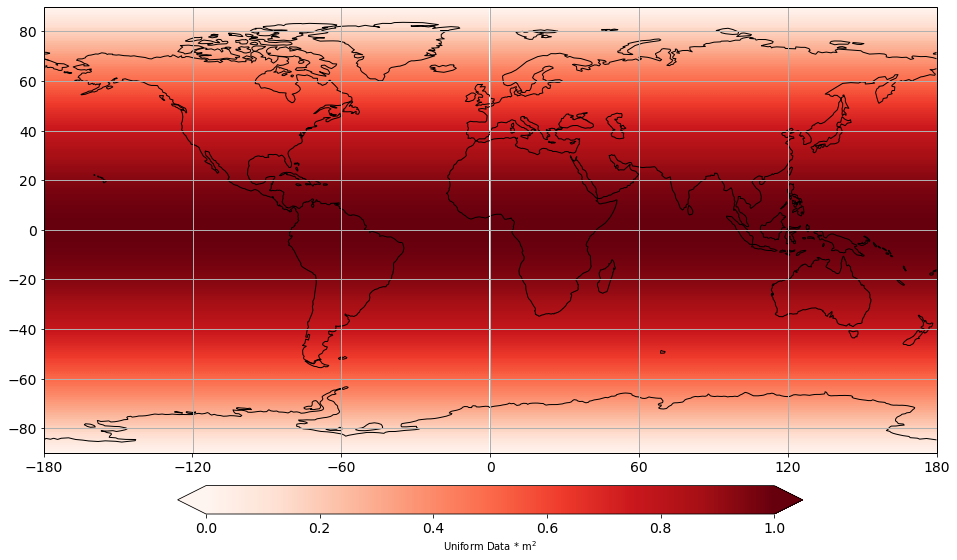

In [180]:
# Plot again
# Plot just like the global PSL.
# Use a different color map, e.g. cmap = "Reds"

# define projection
# The projection keyword determines how the plot will look
fig, ax = plt.subplots(1, 1, figsize=(16,12))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.gridlines(linewidth=1)
ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax.set_yticks([-80, -60, -40, -20, 0, 20, 40, 60, 80], crs=ccrs.PlateCarree())

# uncomment and complete the line below 
pc = ax.pcolormesh(lon,lat,uniform_data_cos,cmap="Reds")
cax,kw = mpl.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)
out=fig.colorbar(pc,cax=cax,extend='both',**kw)
out.set_label('Uniform Data * m${^2}$',size=10)

This plot shows that the contribution to the total area on the sphere for a given rectangular grid box decreases as we move away from the equator. 

If we have uniform data on a sphere, i.e. 1's everywhere, then the global average should be 1. If we look at the plot above, we will not get a global average of 1. Hmmm... why not? What we need to do next is normalize the weighted data by the total fractional area.

Let's compare taking the simple arthimetic mean of our weighted data with that which is normalized by the total fractional area.

In [181]:
# compare means
simple_mean = uniform_data_cos.mean()
weighted_mean = uniform_data_cos.sum()/cos_tmp.sum()
print(simple_mean,weighted_mean)

0.6339691245302372 1.0000000197805614


Now, let's calculate the area-averaged trend for 60S-90S. How would you go about doing this?

In [182]:
# extract 60-90S range for trend and cos_tmp
trend_6090S = trend[53:,:]
cos_tmp_6090S = cos_tmp[147+53:,:]

In [183]:
# compute weighted trend and area-average
trend_weighted = trend_6090S*cos_tmp_6090S
trend_weighted_mean = trend_weighted.sum()/cos_tmp_6090S.sum()
print(trend_weighted_mean)

-0.01100894371684247
